 ## **HOMEWORK 4**

Afonso Rosa, ist1106700<br>
Leticia Vong, ist1105991

**II. Programming and critical analysis** [11v]

In the next exercise you will use the accounts.csv dataset. This dataset contains account details of bank clients, and the target variable yis binary (‘has the client subscribed a term deposit?’). Select the first 8 features and remove duplicates and null values.
<br>

**1.** Normalize the data using MinMaxScaler: <br> <br>
**a.** [4v] Using sklearn, apply k-means clustering (without targets) on the normalized data with k={2,3,4,5,6,7,8}, max_iter=500 and random_state=42. Plot the different sum of squared errors (SSE) using the _inertia attribute of k-means according to the number of clusters.

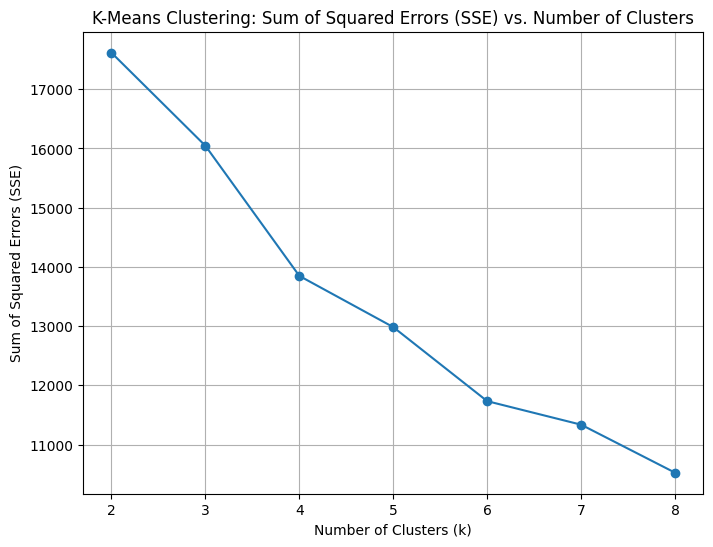

In [14]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = pd.read_csv('accounts.csv')

data = data.iloc[:, :8]

data = data.drop_duplicates()
data = data.dropna()

data = pd.get_dummies(data, drop_first=True)

scaler = MinMaxScaler()
data_scaled_minMax = scaler.fit_transform(data)

k_values = [2, 3, 4, 5, 6, 7, 8]

sse = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, max_iter=500, random_state=42)
    kmeans.fit(data_scaled_minMax)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, sse, marker='o')
plt.title('K-Means Clustering: Sum of Squared Errors (SSE) vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show()


**b.** [1.5v] According to the previous plot, how many underlying customer segments (clusters) should there be? Explain based on the trade-off between the clusters and inertia.

From k=2 to k=4, there is a significant drop in SSE, indicating that adding more clusters in this range reduces the within-cluster variance significantly. This suggests that adding clusters in this range greatly improves the model.

After k=4, the slope of the curve flattens. The reduction in SSE from k=4 to k=8 becomes progressively smaller. This indicates diminishing returns, where adding more clusters doesn't significantly improve the clustering quality (in terms of reducing SSE).

•	The "elbow point" is the value of k where the SSE starts to decrease at a slower rate. This is often seen as the point where the plot changes from a steep decline to a more gradual slope.

•	Based on the elbow method, the optimal number of clusters is likely around k=4. This means that the customer base can be segmented into 4 distinct clusters, balancing between model accuracy and complexity.





De k=2 a k=4 há uma grande diminuição do valor de SSE, o que indica que aumentar o número de clusters neste intervalo reduz significativamente a variância para cada cluster, o que sugere que esse aumento melhora o modelo.

Para valores de k maiores que 4, a descida já não é tão acentuada, o que mostra que adicionar mais clusters não vai ter tanta influência na redução de SSE e na melhoria do modelo.

Esta análise mostra-nos que o valor ideal de clusters seria 4, o que permitiria um equilíbrio entre a exatidão e a complexidade do modelo.


**c.** [1.5v] Would k-modes be a better clustering approach? Explain why based on the dataset features

Evaluating the Dataset Features:

1.	If the Dataset has Mostly Numerical Features:
o	K-Means would be a more appropriate method since it works well with continuous, numerical data, using Euclidean distances and calculating centroids based on the mean of the points in a cluster.


2.	If the Dataset has Many Categorical Features:
o	K-Modes would be better suited for categorical data because it clusters based on the most frequent categories (modes), which is more meaningful for non-numeric attributes like customer type, job categories, or preferences.
o	Categorical data doesn’t have a meaningful "mean," so using K-Means on such data can lead to poor results, as the centroid (mean) doesn't represent any actual value in the dataset.
Mixed Data (Numerical and Categorical):
•	If your dataset has a mix of numerical and categorical features, you might consider:
o	K-Prototypes: This method is a hybrid approach that combines K-Means for numerical features and K-Modes for categorical features, allowing it to handle mixed data types effectively.
Practical Consideration:
•	Check the Data: If the dataset has been transformed using pd.get_dummies() (as per the original instruction), categorical variables might have been converted into binary indicator variables (0 or 1). In such cases, K-Means could still work well because these binary features can now be treated as numerical, and the Euclidean distance may still be effective.

Why Not K-Modes?
•	K-Modes is designed for clustering categorical data and uses a different distance metric that works well with categories. However, it does not handle numerical data effectively because:
o	It doesn’t use the concept of mean or distance appropriate for continuous values (like age or balance).
o	Thus, it wouldn’t properly account for the variation in your numerical features, which might be important in distinguishing customer segments.




K-modes não seria um melhor modelo pois atua melhor com categorical data (a sua medida de distância é melhor para categorical data) e não trabalha tão bem como dados numéricos uma vez que usa a média nem distâncias apropriadas para valores contínuos.


**2.** Normalize the data using StandardScaler: <br> <br>
**a.** [1v] Apply PCA to the data. How much variability is explained by the top 2 components?

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
data_scaled_standard = scaler.fit_transform(data)

pca = PCA(n_components=8)
pca.fit(data_scaled_standard)

explained_variance_top_2 = pca.explained_variance_ratio_[:2].sum()

print(f"Variability explained by the top 2 components: {explained_variance_top_2:.2%}")

Variability explained by the top 2 components: 22.76%


**b.** [1v] Apply k-meansclustering with k=3 and random_state=42 (all other arguments as default) and use the original 8 features. Next, provide a scatterplot according to the first 2 principal components. Can we clearly separate the clusters?
Justify.

**c.** [2v] Plot the cluster conditional features of the frequencies of “job” and ”education” according to the clusters obtained in the previous question (2b.). Use sns.distplot (see Data Exploration notebook),with multiple="dodge",stat='density', shrink=0.8 and common_norm=False. Describe the main differences between the clusters in no more than half a page.